In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
caminho_csv_original = '/content/StudentsPerformance.csv'
caminho_csv_sem_aspas = '/content/StudentsPerformance1.csv'

with open(caminho_csv_original, 'r', encoding='utf-8') as f:
    conteudo = f.read()

conteudo_novo= conteudo.replace('"', '')
conteudo_novo= conteudo_novo.replace('some high school', 'high school')

with open(caminho_csv_sem_aspas, 'w', encoding='utf-8') as f:
    f.write(conteudo_novo)

df = pd.read_csv('/content/StudentsPerformance1.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


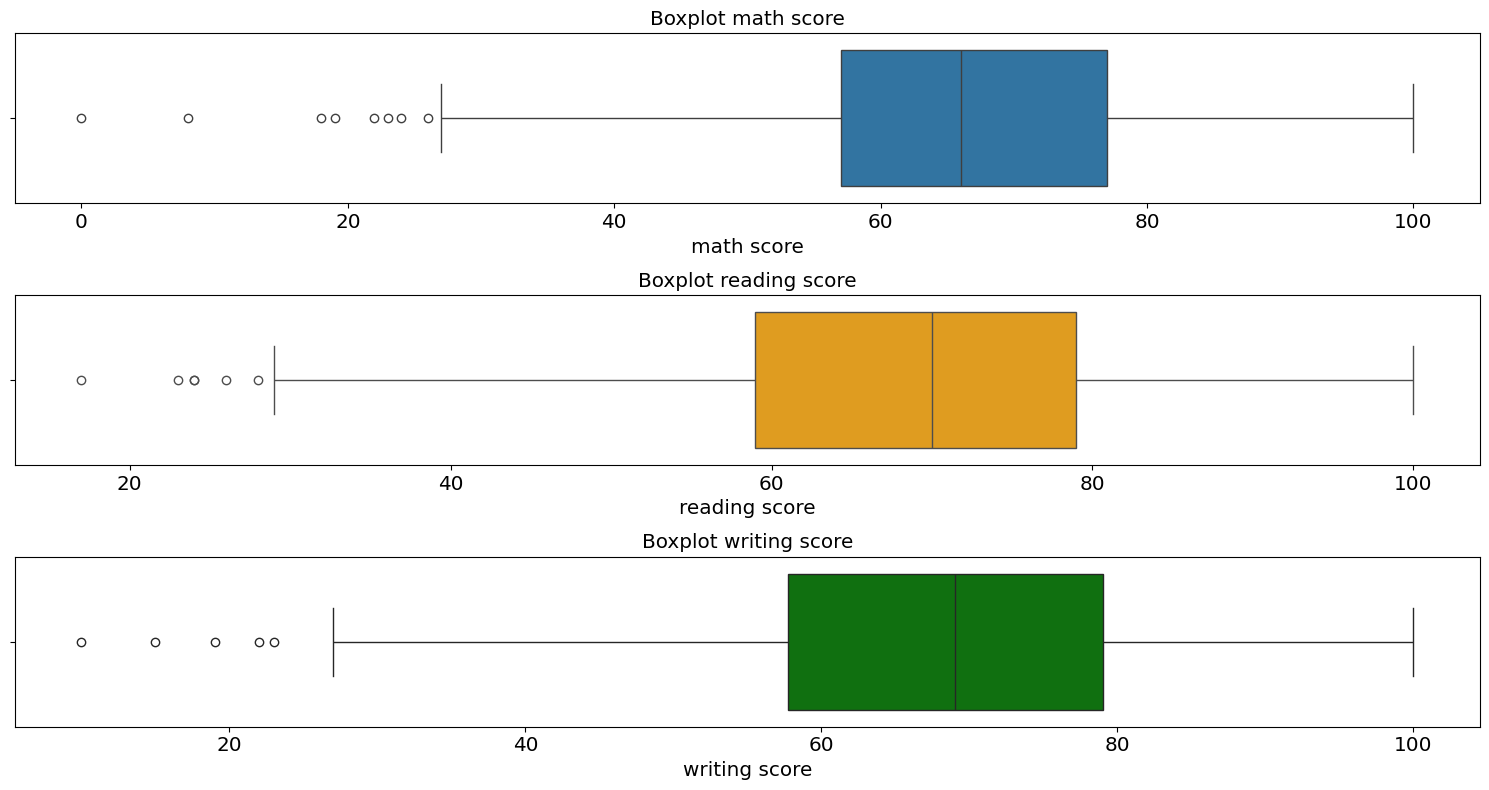

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(15, 8))

sns.boxplot(data=df, x='math score', ax=axes[0])
axes[0].set_title('Boxplot math score')

sns.boxplot(data=df, x='reading score', ax=axes[1], color='orange')
axes[1].set_title('Boxplot reading score')

sns.boxplot(data=df, x='writing score', ax=axes[2], color='green')
axes[2].set_title('Boxplot writing score')

plt.tight_layout()

=============== math score =====================
Desvio padrao:  15.155496659628165
Media:  66.089
Minimo:  0
Maximo:  100
Q1:  57.0
Mediano :  66.0
Q3:  77.0


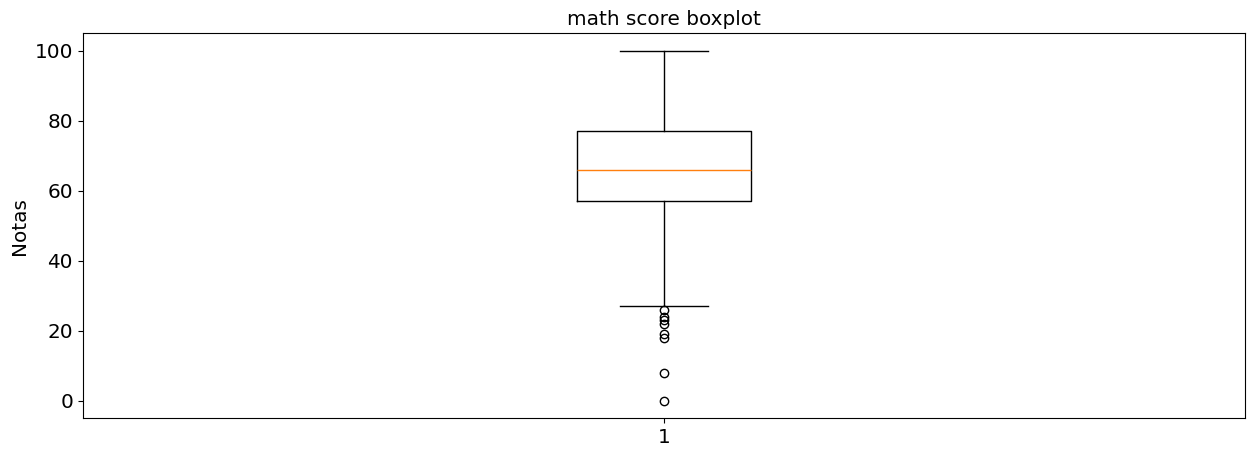

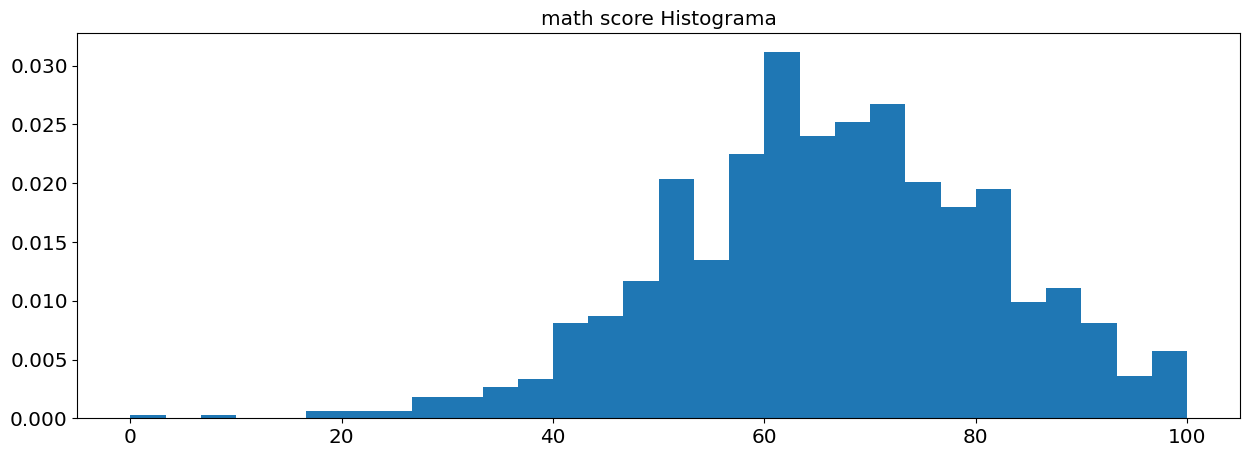

=============== reading score =====================
Desvio padrao:  14.59289001534652
Media:  69.169
Minimo:  0
Maximo:  100
Q1:  59.0
Mediano :  70.0
Q3:  79.0


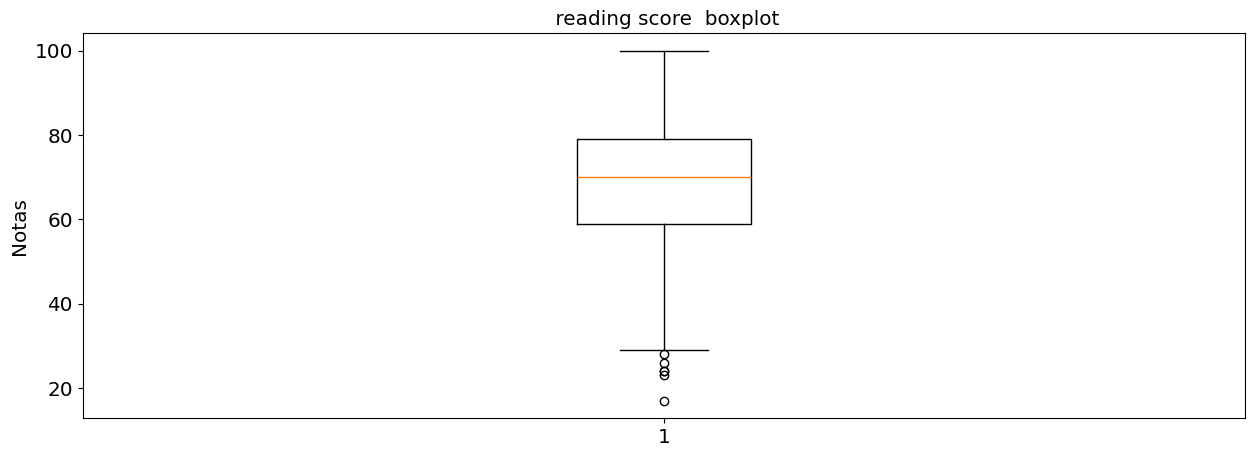

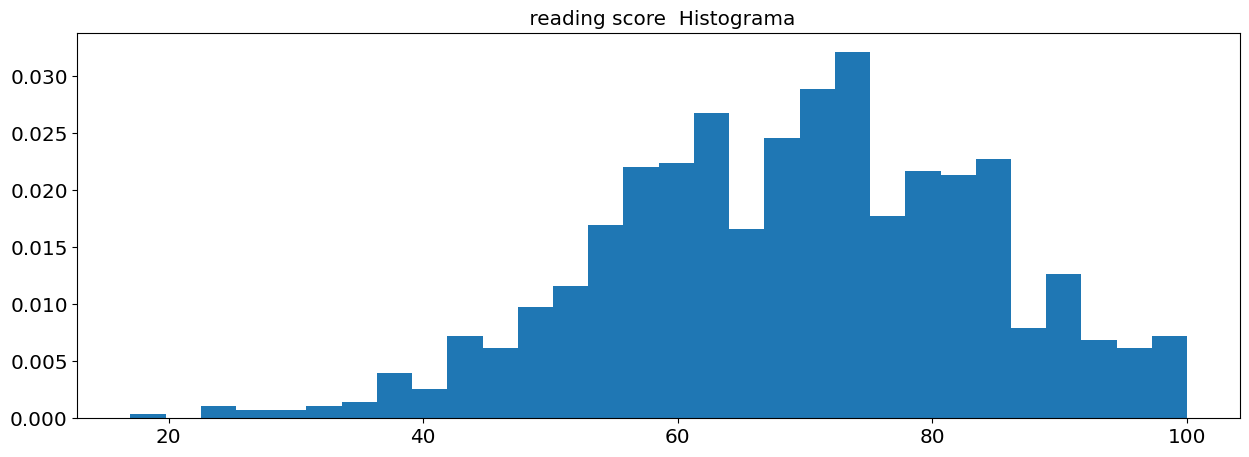

=============== writing score =====================
Desvio padrao:  15.188057281956757
Media:  68.054
Minimo:  0
Maximo:  100
Q1:  57.75
Mediano :  69.0
Q3:  79.0


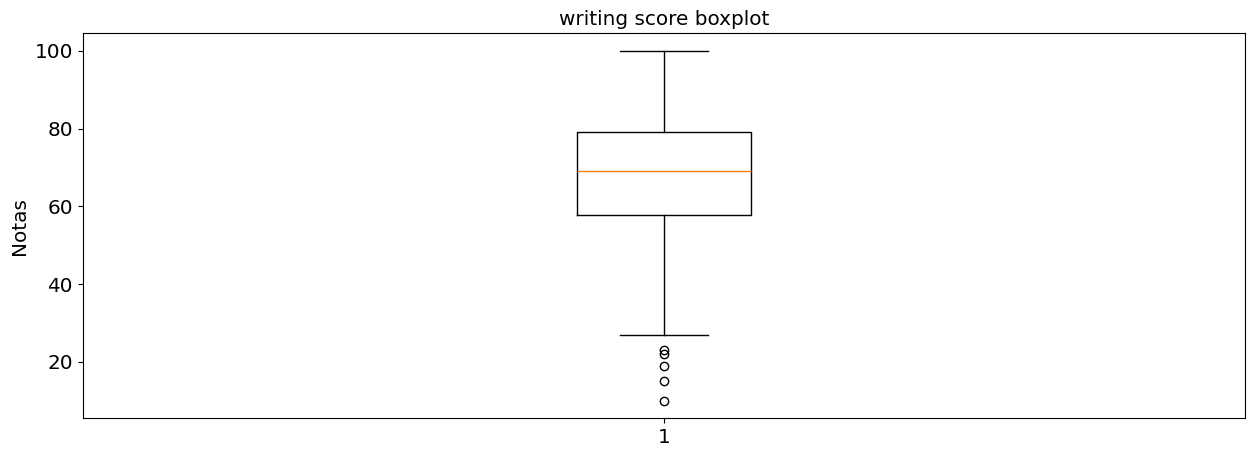

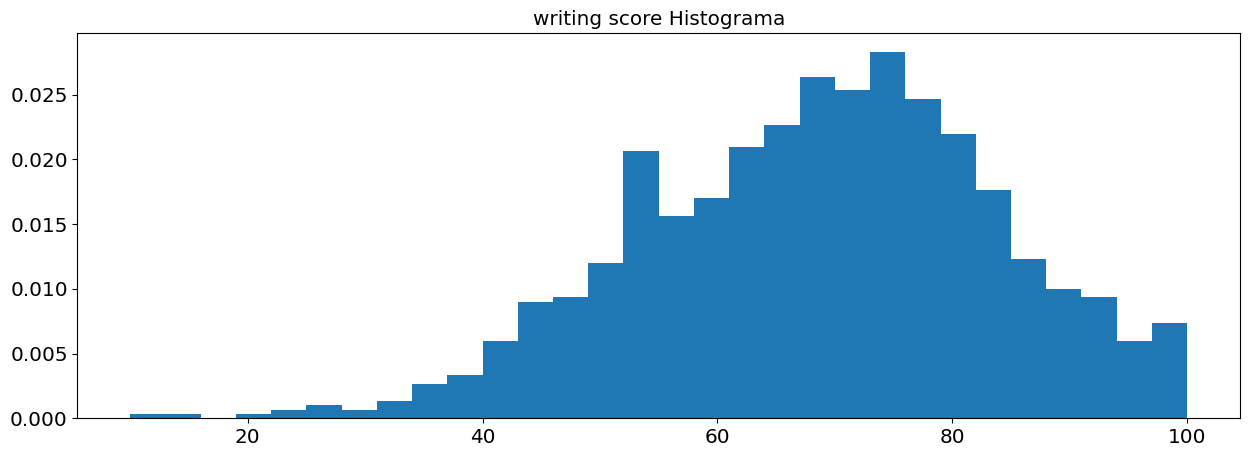

In [7]:

desvio_padrao_read = np.std(df["reading score"])
desvio_padrao_write = np.std(df["writing score"])

def get_avg(arry,label):

  valu = 0.0
  for i in arry:
   valu += i
  print("Desvio padrao: ",np.std(arry))
  print("Media: ",valu/arry.size)

  min_v = 0
  max_v = 0

  for i in arry:
    if i > max_v:
      max_v = i
    if i < min_v:
      min_v = i

  print("Minimo: " ,min_v)
  print("Maximo: ",max_v)

  print("Q1: ",np.percentile(arry, 25))  # Q1
  print("Mediano : ",np.percentile(arry, 50))
  print("Q3: ",np.percentile(arry, 75))





  plt.title(label + " boxplot")
  plt.boxplot(arry)
  plt.ylabel('Notas')
  plt.show()
  plt.title(label + " Histograma")
  plt.hist(arry, density=True, bins=30,label=label)
  plt.show()
print("=============== math score =====================")
get_avg(df["math score"],"math score")

print("=============== reading score =====================")
get_avg(df["reading score"]," reading score ")

print("=============== writing score =====================")
get_avg(df["writing score"],"writing score")


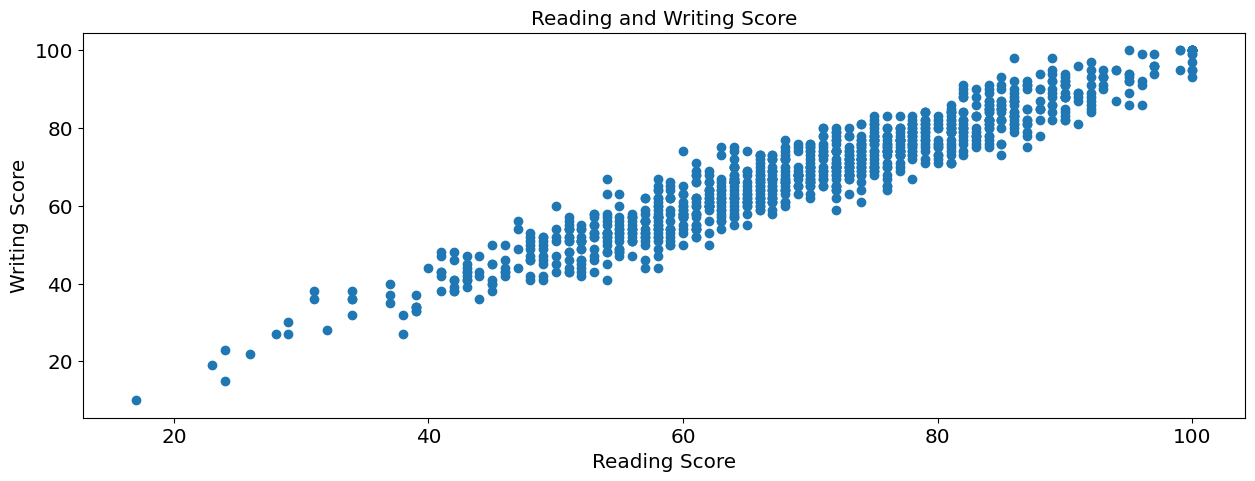

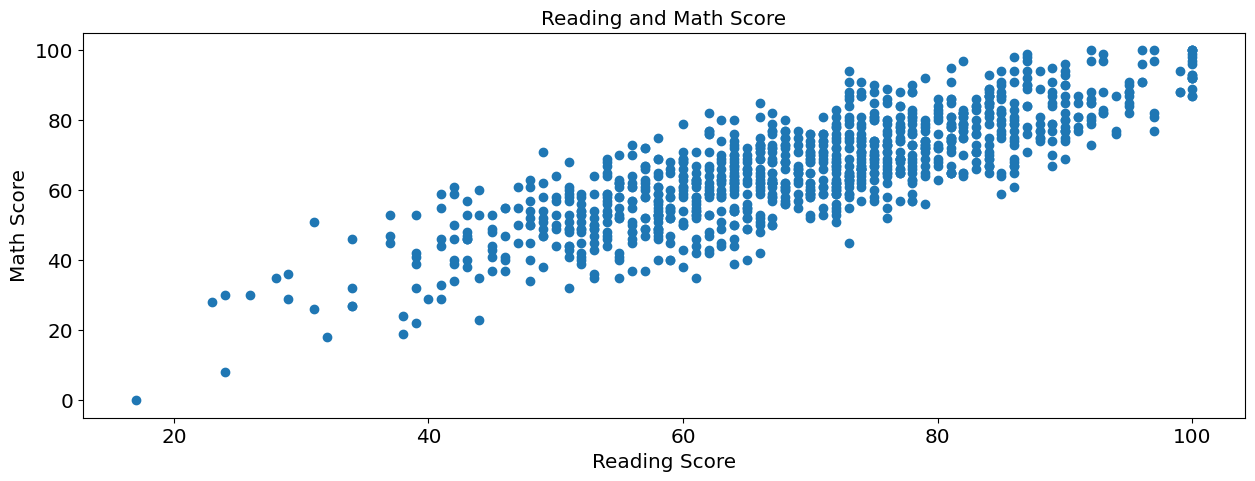

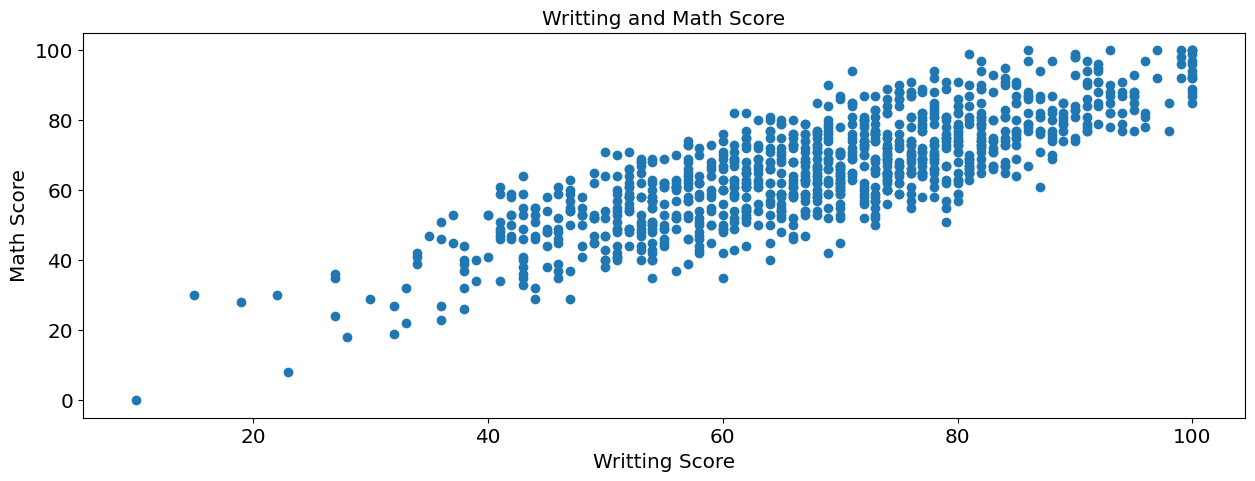

In [ ]:
plt.title("Reading and Writing Score")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
##Acho interessante esse, a linha de Reading + Writting é bem mais estavel
plt.scatter(df["reading score"],df["writing score"])
plt.show()
plt.title("Reading and Math Score")
plt.scatter(df["reading score"],df["math score"])
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.show()
plt.title("Writting and Math Score")
plt.scatter(df["writing score"],df["math score"])
plt.xlabel("Writting Score")
plt.ylabel("Math Score")
plt.show()

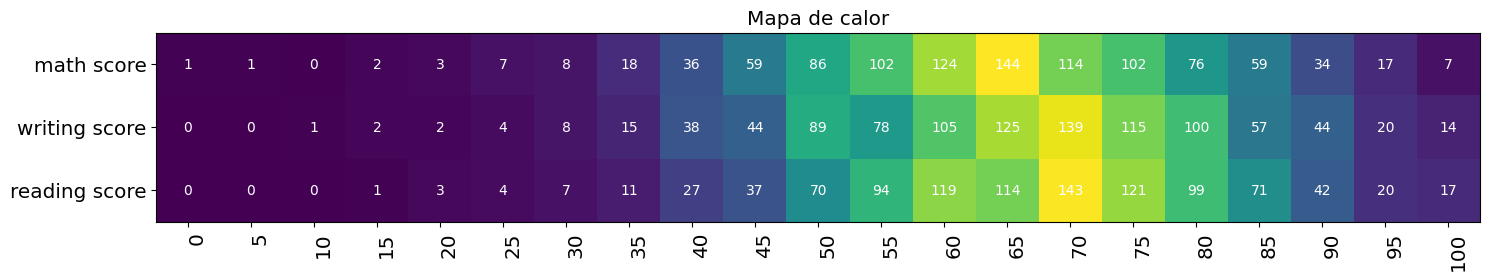

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

def get_avg(arry):
    arr = [0] * 21
    for val in arry:
        index = min(val // 5, 20)
        arr[index] += 1
    return arr


number = [str(i * 5) for i in range(21)]


vegetables = ["math score", "writing score", "reading score"]

dataset = np.array([
    get_avg(df["math score"]),
    get_avg(df["writing score"]),
    get_avg(df["reading score"])
])

fig, ax = plt.subplots()
im = ax.imshow(dataset)


ax.set_xticks(range(len(number)), labels=number, rotation=90, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(vegetables)), labels=vegetables)


for i in range(len(vegetables)):
    for j in range(len(number)):
        text = ax.text(j, i, dataset[i, j], ha="center", va="center", color="w")

ax.set_title("Mapa de calor")
fig.tight_layout()
plt.show()

- Notas de matemática abaixo de 25 são outliers<br>
- Notas de leitura abaixo de 30 são outliers<br>
- Notas de escrita abaixo de 27 são outliers<br>

Seria bom permanecer com esses outliers para identificar quais características interferem no desempenho dos estudantes.